## PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#random generator
rng = np.random.RandomState(1)

#generate 2 features data
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
X.shape

(200, 2)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

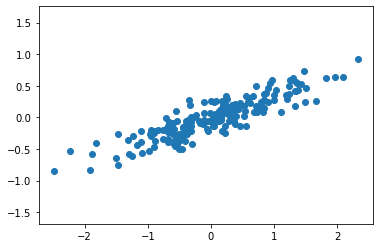

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal') # centering???

(2,)
shape of S (2, 2)
(200, 200)
shape of eigenvalues (2,)
shape of eigenvectors (2, 2)
[0.0184779 0.7625315]
[1 0]
[0.7625315 0.0184779]


(-2.72728878056785,
 2.9144798642810295,
 -0.428095936878651,
 0.33954864905102083)

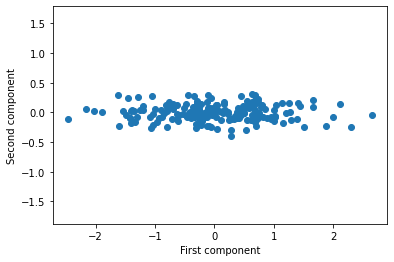

In [65]:
#subtract X from mean; use np.mean
mean = np.mean(X,axis = 0)
print(mean.shape)
X = X-mean
# print(X)

#find the covariance of X manually
m,n = X.shape
S = X.T@X / (m-1)
print('shape of S',S.shape)

#find the eigenvalues and eigenvectors using np.linalg.eigh(cov)
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eigh(S)
# print(w)
# print(v)

# # optionally- find the eigenvalues and eigenvectors using svd (answer in my assignments)
# U,S,VT = LA.svd(X) # use X not cov
# print(U.shape)
# # eigenvalues = 
# # eigenvecs = VT.T
# # projected = 



#print the shape of eigenvalues and eigenvectors; make sense of it
print('shape of eigenvalues',eigenvalues.shape)
print('shape of eigenvectors',eigenvectors.shape)
# print(w)
# print(v)

# #define how many principal components you want, i.e., what are the final dimension you want
n_components = 2


# #perform argsort and get the index of the biggest to smallest eigenvalues
print(eigenvalues)
ix = np.argsort(eigenvalues)[::-1]
ix = ix[0:n_components]
print(ix)
print(eigenvalues[ix])
# print('eigenvector')

# #set the eigenvalues according to these indexes according to these indices.
# eigenvalues,eigenvectors = eigenvectors[ix],eigenvectors[something,:ix:]
# eigenvalues = eigenvalues[ix]
eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:,ix]

# #get the projected X --> z (X @ eigenvectors) -> b^T x -> XB-> B =eigenvectors
projected = X@eigenvectors #Z
# #plot the graph
plt.scatter(projected[:,0],projected[:,1])

plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('equal')

(-2.762782885920728, 2.53676275904173, -0.9285374399262483, 1.0084945478208098)

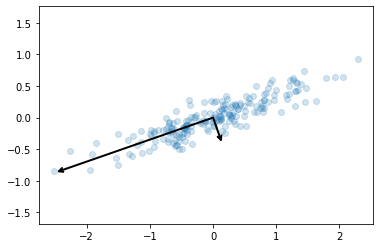

In [63]:
#what if i want to plot the eigenvectors on the original plot

plt.scatter(X[:,0],X[:,1],alpha =0.2)

def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca() # get the current axis
    arrowprops = dict(arrowstyle = '->',linewidth = 2,shrinkA = 0, shrinkB = 0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
for length,vector in zip(eigenvalues, eigenvectors.T):
    loading = vector * 3*np.sqrt(length) #3 just to make it more clearn # sqrt var = std # eiganvalues is the var
    draw_vector(mean,mean+loading) # mean is the origin, plot from the center # the starting points
plt.axis('equal')
    
    

In [88]:
# optionally- find the eigenvalues and eigenvectors using svd (answer in my assignments)
U,S,VT = LA.svd(X) # use X not cov
print(U.shape)
print(S.shape)
print(VT.shape)
#### svd doesnt give diagonal s
#### therefore, we must make it in the right form
eigenvalues = S**2/m
eigenvecs = VT.T

full_S = np.zeros((X.shape[0],X.shape[1]),dtype = float)
full_S[:X.shape[1],:X.shape[0]] = np.diag(S)

# projected = X @ eigenvecs
projected = U@full_S


(200, 200)
(2,)
(2, 2)


(-2.914479864281029, 2.72728878056785, -0.428095936878651, 0.3395486490510208)

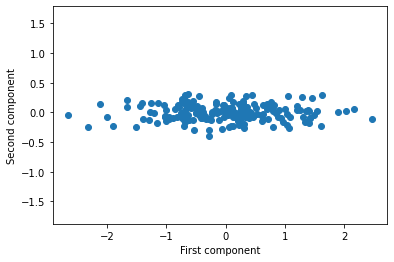

In [89]:
plt.scatter(projected[:,0],projected[:,1])

plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('equal')